## Boom Bikes Rental Case Study

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. Company wants to understand the factors affecting the demand for these shared bikes in the American market.

### Key Objectives

Company wants to understand the factors affecting the demand for these shared bikes in the American market
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.


### Business Goals

Build a model the demand for shared bikes with the available independent variables so that management wants
- To understand how exactly the demands vary with different features. 
- Use the model to manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
# reading the data file
bikes_demand = pd.read_csv('C:/Ashwani/Upgrad/Machine Learning/Linear Regression Assignment/day.csv')

In [3]:
bikes_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes_demand.shape

(730, 16)

In [5]:
bikes_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No Null values found

In [6]:
bikes_demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data
Working on one of the most important step - understanding the data. We'll visualise our data using matplotlib and seaborn.
 
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable. If there is some obvious multicollinearity going on, this is the first place to catch it 


### Visualising Numeric Variables
Pairplot of all the numeric variables

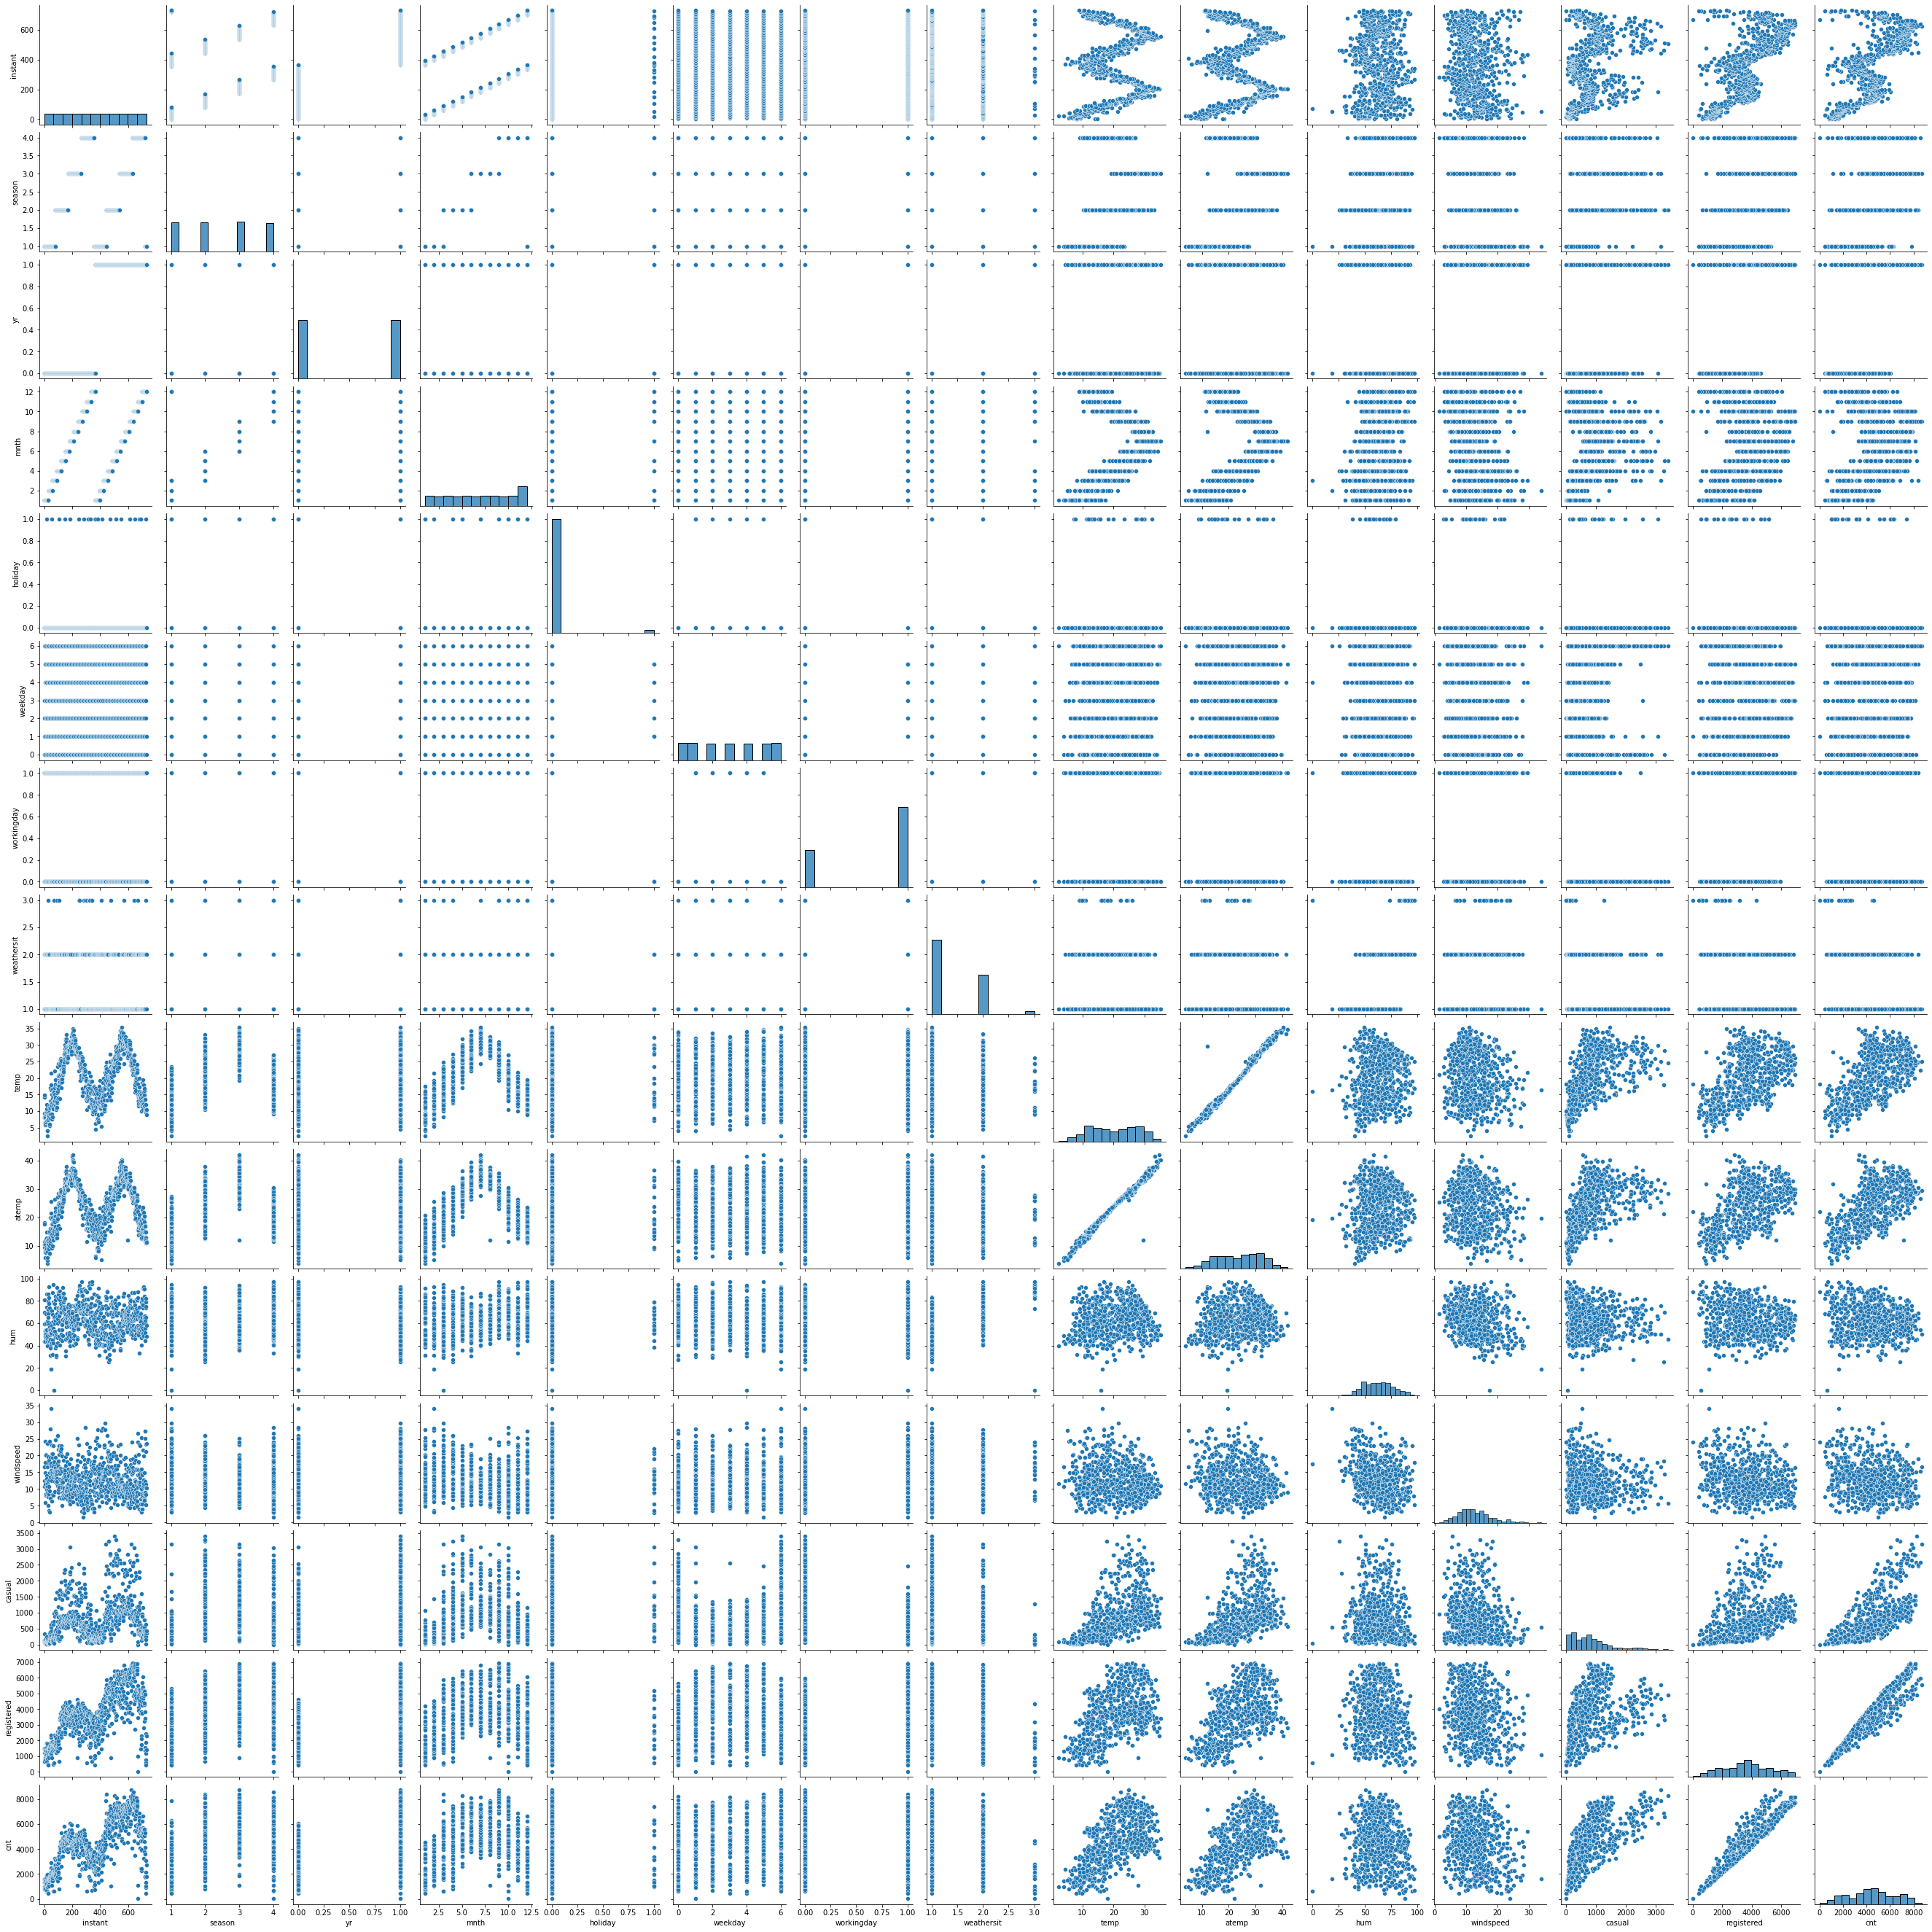

In [7]:
sns.pairplot(bikes_demand)
plt.show()

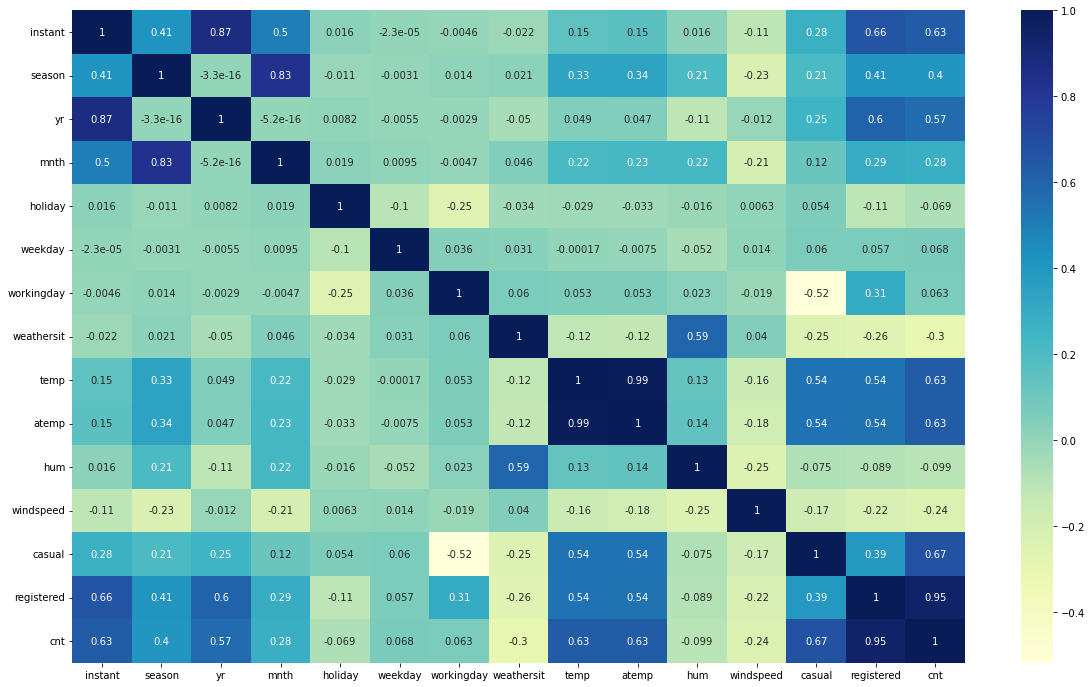

In [8]:
# check correlation coefficients to see which variables are highly correlated
plt.figure(figsize= (20,12))
sns.heatmap (bikes_demand.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Visualising Categorical Variables
 Let's map variables and make a boxplot for some of these variables.

In [9]:
# mapping of Categorical variables 
bikes_demand[["season"]]=bikes_demand[["season"]].apply(lambda x:x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"}))
bikes_demand[['mnth']]=bikes_demand[['mnth']].apply(lambda x:x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5: "May", 6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11: "Nov",12:"Dec"}))
bikes_demand[['weathersit']] = bikes_demand[['weathersit']].apply(lambda x:x.map({1:'ClearClouds',2:"MistCloudy",3:"LightSnow",4:"HeavyRain"}))
bikes_demand[['weekday']] = bikes_demand[['weekday']].apply(lambda x:x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}))
bikes_demand[['holiday']] = bikes_demand[['holiday']].apply(lambda x:x.map({0:"No",1:"Yes"}))
bikes_demand[['workingday']] = bikes_demand[['workingday']].apply(lambda x:x.map({0:"No",1:"Yes"}))
bikes_demand[['yr']] = bikes_demand[['yr']].apply(lambda x:x.map({0:"2018",1:"2019"}))

In [10]:
bikes_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,No,Sat,No,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,No,Sun,No,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,No,Mon,Yes,ClearClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,No,Tue,Yes,ClearClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,No,Wed,Yes,ClearClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


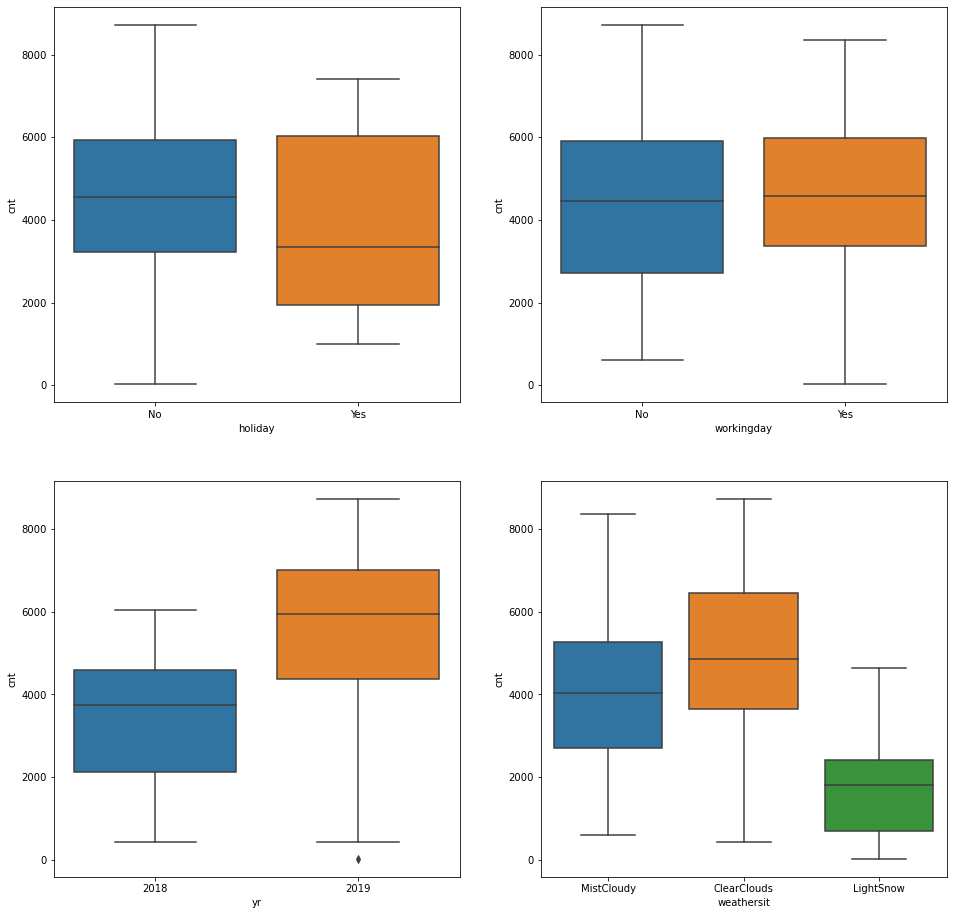

In [11]:
plt.figure(figsize=(16, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_demand)
plt.subplot(2,2,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_demand)
plt.subplot(2,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_demand)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_demand)
plt.show()

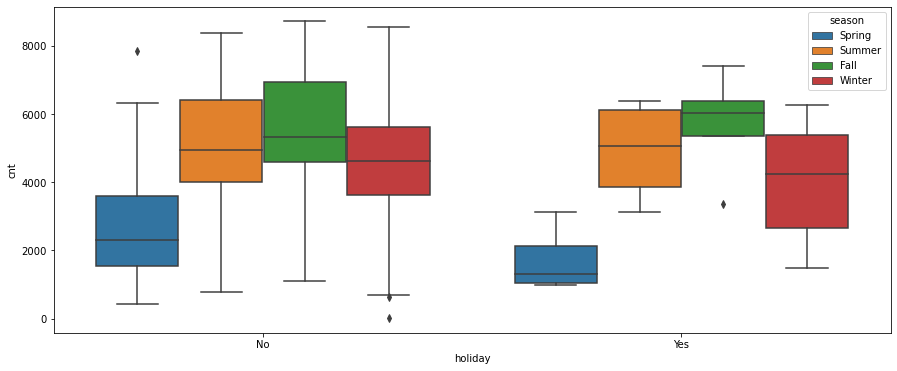

In [12]:
#We can also visualise some of these categorical features parallely by using the hue argument. 

plt.figure(figsize = (15, 6))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'season', data = bikes_demand)
plt.show()

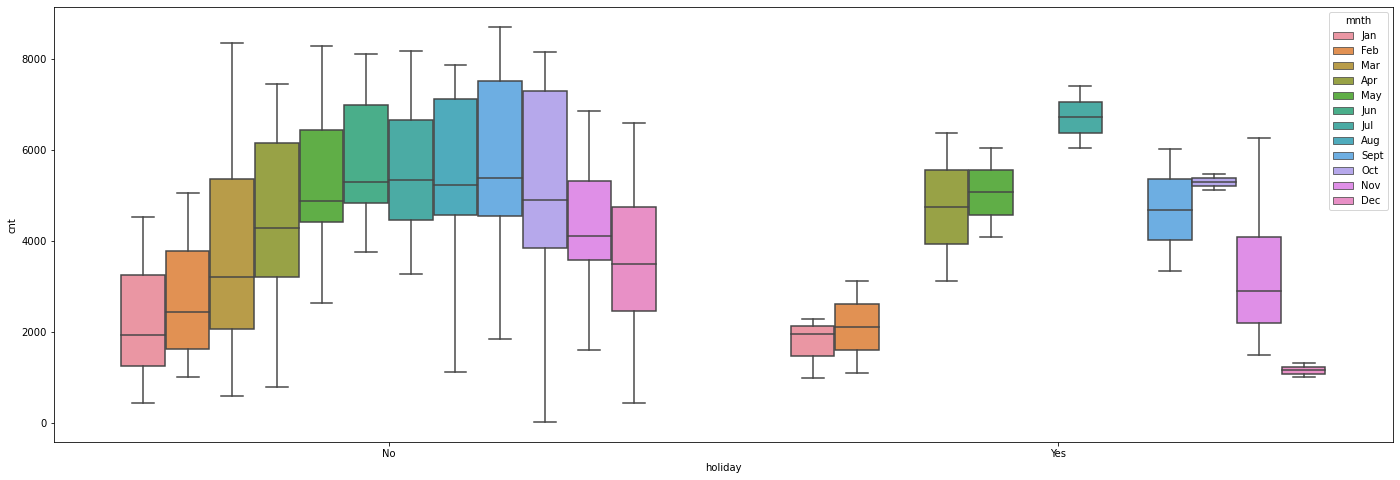

In [13]:
plt.figure(figsize = (24, 8))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'mnth', data = bikes_demand)
plt.show()

## Observations based on initial Visualization
- Demand is high during Working days
- Demand is high during Fall and Summer seasons ( more specifically in the months of June, Aug and Sept)
- Demand is high when weather is Clear, less or partly cloudy
- Demand is high in 2019 compared to 2018
- Demand increases with temperature
- Demand decreases with humidity and windspeed


- *atemp* and *temp* are highly correlated
- *cnt* and *registered* are highly correlated
- *season* and *mnth* are highly correlated


## Dropping variables based on EDA and Visualization

- *instant* is just an record index, so can be dropped.
- *cnt* (target variable) is total casual and registered, hence those two can be dropped.
- *dteday* can be dropped, as other date variables like month, weekday, year etc. are present.
- *atemp* and *temp* are highly correlated, so dropping atemp
- *season* and *mnth* are highly correlated and from box plots it is also clear that months within season do not show huge variation, so dropping mnth


In [14]:
bikes_demand = bikes_demand.drop(['instant', 'dteday','casual', 'registered', 'atemp', 'mnth'], axis = 1)

In [15]:
bikes_demand.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,No,Sat,No,MistCloudy,14.110847,80.5833,10.749882,985
1,Spring,2018,No,Sun,No,MistCloudy,14.902598,69.6087,16.652113,801
2,Spring,2018,No,Mon,Yes,ClearClouds,8.050924,43.7273,16.636703,1349
3,Spring,2018,No,Tue,Yes,ClearClouds,8.200000,59.0435,10.739832,1562
4,Spring,2018,No,Wed,Yes,ClearClouds,9.305237,43.6957,12.522300,1600


# Visualizing Numerical Values again

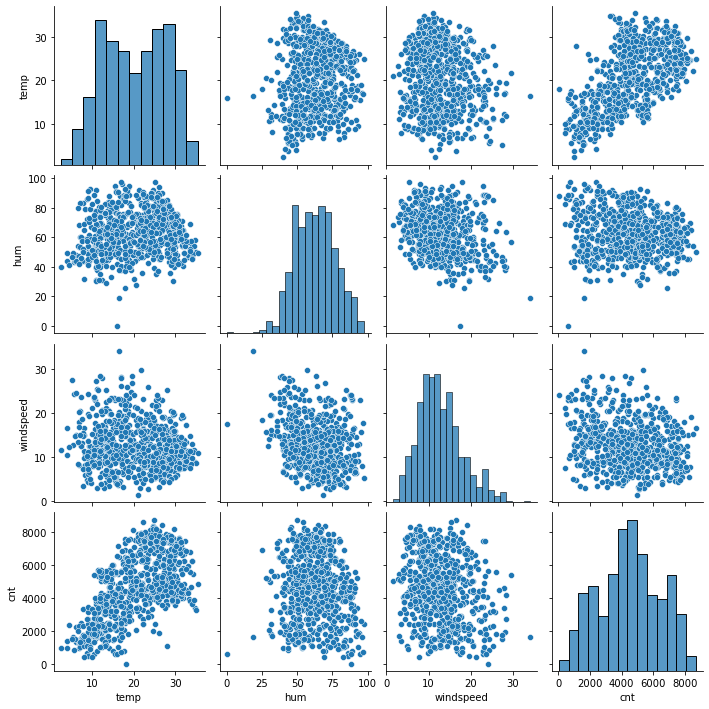

In [16]:
sns.pairplot(bikes_demand)
plt.show()

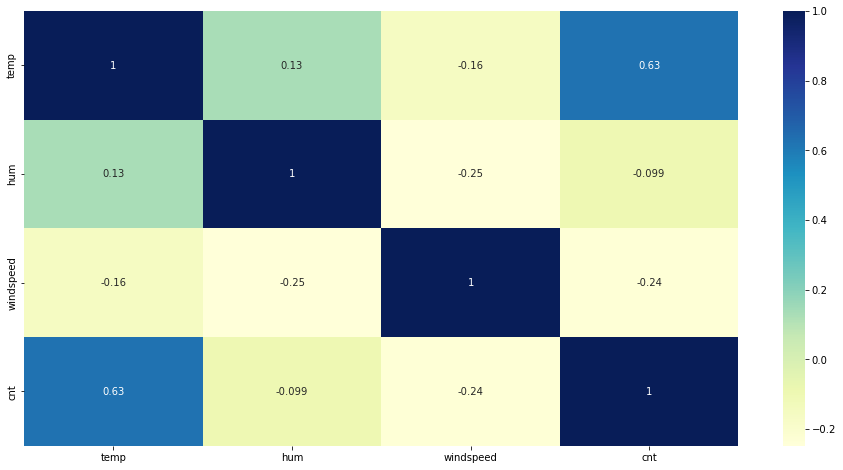

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize= (16,8))
sns.heatmap (bikes_demand.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Similar observations found
- Demand goes high with rise in temperature
- Demand is inversely affected by humidity
- Demand is inversely affected by windspeed

## Step 3: Data Preparation
You can see that your dataset has many columns categorical values. But in order to fit a regression line, we would need numerical values again and not string. 

### Dummy Variables
We need to convert categorical values into integer as well. For this, we will use dummy variables.

In [18]:
## Dummy columns creation

df_season = pd.get_dummies(bikes_demand['season'], drop_first=True)
df_weather = pd.get_dummies(bikes_demand['weathersit'], drop_first=True)
df_weekday=pd.get_dummies(bikes_demand['weekday'], drop_first=True)
df_year = pd.get_dummies(bikes_demand['yr'], drop_first=True, prefix='Year')
df_holiday= pd.get_dummies(bikes_demand['holiday'], drop_first=True, prefix='Holiday')
df_workingday = pd.get_dummies(bikes_demand['workingday'], drop_first=True, prefix='Workingday')

In [19]:
print(df_season)
print(df_workingday)

     Spring  Summer  Winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]
     Workingday_Yes
0                 0
1                 0
2                 1
3                 1
4                 1
..              ...
725               1
726               1
727               0
728               0
729               1

[730 rows x 1 columns]


In [20]:
bikes_demand = pd.concat([bikes_demand, df_season], axis=1)
bikes_demand = pd.concat([bikes_demand, df_weather], axis=1)
bikes_demand = pd.concat([bikes_demand, df_weekday], axis=1)
bikes_demand = pd.concat([bikes_demand, df_year], axis=1)
bikes_demand = pd.concat([bikes_demand, df_holiday], axis=1)
bikes_demand = pd.concat([bikes_demand, df_workingday], axis=1)

In [21]:
bikes_demand.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
0,Spring,2018,No,Sat,No,MistCloudy,14.110847,80.5833,10.749882,985,...,1,0,1,0,0,0,0,0,0,0
1,Spring,2018,No,Sun,No,MistCloudy,14.902598,69.6087,16.652113,801,...,1,0,0,1,0,0,0,0,0,0
2,Spring,2018,No,Mon,Yes,ClearClouds,8.050924,43.7273,16.636703,1349,...,0,1,0,0,0,0,0,0,0,1
3,Spring,2018,No,Tue,Yes,ClearClouds,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,1
4,Spring,2018,No,Wed,Yes,ClearClouds,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,1


In [22]:
# Droping categorical columns post dummy column creation
bikes_demand.drop(['season','yr', 'weathersit', 'workingday', 'holiday', 'weekday'], inplace=True, axis=1)

In [23]:
bikes_demand.head()

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [24]:
bikes_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            730 non-null    float64
 1   hum             730 non-null    float64
 2   windspeed       730 non-null    float64
 3   cnt             730 non-null    int64  
 4   Spring          730 non-null    uint8  
 5   Summer          730 non-null    uint8  
 6   Winter          730 non-null    uint8  
 7   LightSnow       730 non-null    uint8  
 8   MistCloudy      730 non-null    uint8  
 9   Mon             730 non-null    uint8  
 10  Sat             730 non-null    uint8  
 11  Sun             730 non-null    uint8  
 12  Thu             730 non-null    uint8  
 13  Tue             730 non-null    uint8  
 14  Wed             730 non-null    uint8  
 15  Year_2019       730 non-null    uint8  
 16  Holiday_Yes     730 non-null    uint8  
 17  Workingday_Yes  730 non-null    uin

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [25]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikes_demand, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
print(df_train.shape)
print(df_test.shape)

(510, 18)
(219, 18)


### Rescaling the Features
 it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. We will use MinMax scaling.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
df_train.head()

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
653,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,1,0,1,0,1
576,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,1,0,1
426,16.980847,62.1250,10.792293,4066,1,0,0,0,1,0,1,0,0,0,0,1,0,0
728,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,1,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [30]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
653,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,1,0,1,0,1
576,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,1,0,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,1,0,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [32]:
df_train.describe()

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.507843,0.025490,0.676471
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.500429,0.157763,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


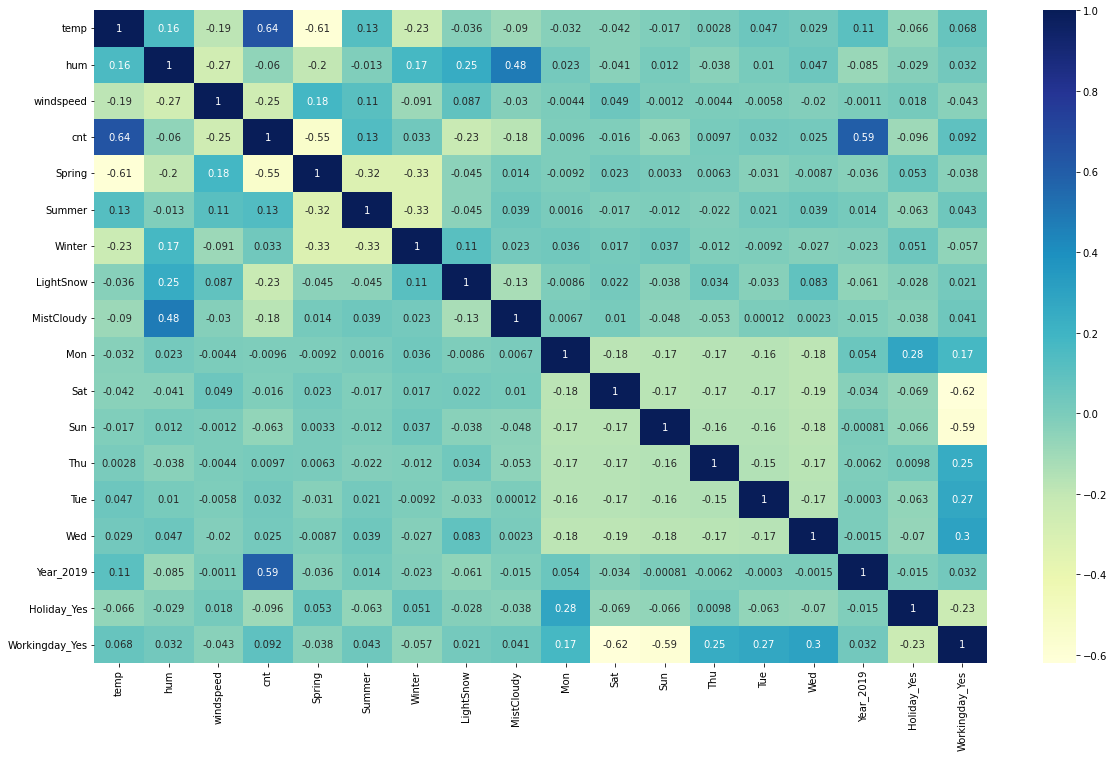

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize= (20,12))
sns.heatmap (df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')


In [35]:
X_train = df_train

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            510 non-null    float64
 1   hum             510 non-null    float64
 2   windspeed       510 non-null    float64
 3   Spring          510 non-null    uint8  
 4   Summer          510 non-null    uint8  
 5   Winter          510 non-null    uint8  
 6   LightSnow       510 non-null    uint8  
 7   MistCloudy      510 non-null    uint8  
 8   Mon             510 non-null    uint8  
 9   Sat             510 non-null    uint8  
 10  Sun             510 non-null    uint8  
 11  Thu             510 non-null    uint8  
 12  Tue             510 non-null    uint8  
 13  Wed             510 non-null    uint8  
 14  Year_2019       510 non-null    uint8  
 15  Holiday_Yes     510 non-null    uint8  
 16  Workingday_Yes  510 non-null    uint8  
dtypes: float64(3), uint8(14)
memory us


# Building a linear model

In [37]:
## Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### RFE - Recurssive Feature Elimination

In [39]:
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train,y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('LightSnow', True, 1),
 ('MistCloudy', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thu', False, 5),
 ('Tue', False, 4),
 ('Wed', False, 6),
 ('Year_2019', True, 1),
 ('Holiday_Yes', True, 1),
 ('Workingday_Yes', True, 1)]

In [41]:
col = list(X_train.columns[rfe.support_])
col

['temp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'LightSnow',
 'MistCloudy',
 'Sat',
 'Year_2019',
 'Holiday_Yes',
 'Workingday_Yes']

In [42]:
X_train.columns[~rfe.support_]

Index(['Mon', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

### Build model iteratively. Using statsmodel for detailed statistics

In [43]:
X_train_rfe = X_train[col]

In [44]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.13e-184
Time:                        02:49:13   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2445      0.037      6.

In [45]:
X_train_new = X_train_rfe.drop (['const'], axis =1)
X_train_new.columns

Index(['temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter', 'LightSnow',
       'MistCloudy', 'Sat', 'Year_2019', 'Holiday_Yes', 'Workingday_Yes'],
      dtype='object')

In [46]:
 # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X=X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.53
0,temp,15.72
11,Workingday_Yes,5.26
2,windspeed,4.71
3,Spring,3.91
5,Winter,3.13
4,Summer,2.28
7,MistCloudy,2.28
9,Year_2019,2.08
8,Sat,1.96


### Feature Elimination based on P Test and VIF Score

In [47]:
# removing hum as it has high VIF
X_train_new2 = X_train_new.drop (['hum'], axis=1)

In [48]:
X_train_new2.columns

Index(['temp', 'windspeed', 'Spring', 'Summer', 'Winter', 'LightSnow',
       'MistCloudy', 'Sat', 'Year_2019', 'Holiday_Yes', 'Workingday_Yes'],
      dtype='object')

In [49]:
X_train_new2 = sm.add_constant(X_train_new2)

lm_2 = sm.OLS(y_train, X_train_new2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.98e-183
Time:                        02:49:28   Log-Likelihood:                 489.48
No. Observations:                 510   AIC:                            -955.0
Df Residuals:                     498   BIC:                            -904.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1779      0.031      5.

In [50]:
 # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X=X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.29
3,Spring,4.50
1,temp,3.30
5,Winter,2.98
4,Summer,2.04
11,Workingday_Yes,1.87
8,Sat,1.77
10,Holiday_Yes,1.16
2,windspeed,1.09
6,LightSnow,1.05


In [51]:
# removinh Holiday_Yes as high P value
X_train_new3 = X_train_new2.drop (['Holiday_Yes'], axis=1)

In [52]:
X_train_new3.columns

Index(['const', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter', 'LightSnow',
       'MistCloudy', 'Sat', 'Year_2019', 'Workingday_Yes'],
      dtype='object')

In [55]:
X_train_new3 = sm.add_constant(X_train_new3)

lm_3 = sm.OLS(y_train, X_train_new3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.50e-184
Time:                        02:51:15   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1709      0.031      5.

In [56]:
 # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X=X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.14
3,Spring,4.49
1,temp,3.30
5,Winter,2.98
4,Summer,2.04
10,Workingday_Yes,1.65
8,Sat,1.63
2,windspeed,1.09
6,LightSnow,1.05
7,MistCloudy,1.04


**Now we see VIFs and p-values are within an acceptable range. So we go ahead and make our predictions using this model only.**

#### R-squared train:                          0.829
#### Adj. R-squared train:                  0.825 

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_predictbike = lm_3.predict(X_train_new3)

In [58]:
res = y_train - y_train_predictbike
res

653    0.133158
576    0.026041
426   -0.014790
728   -0.131231
482   -0.105312
         ...   
526    0.012015
578   -0.003767
53    -0.005026
350    0.026026
79    -0.084632
Length: 510, dtype: float64

**Distribution of the error terms**

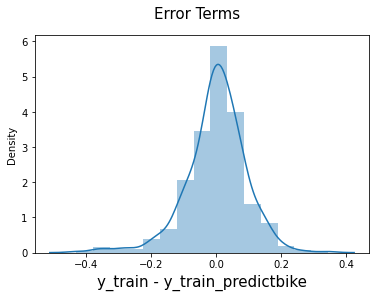

In [59]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_predictbike', fontsize = 15)         # X-label
plt.show()

#### The residuals are following the normally distributed with a mean 0. All good!


#### Looking for patterns in the residuals

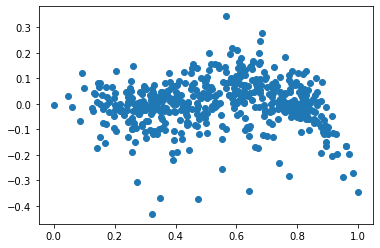

In [60]:

plt.scatter(X_train.iloc[:, 0].values,res)
 
plt.show()

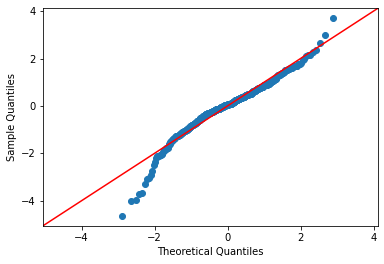

In [61]:
fig = sm.qqplot(res, fit=True, line='45')
plt.show()

# Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 3rd model.

Applying the scaling on the test sets

In [62]:
df_test

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
184,29.793347,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,1,0,1
299,19.270000,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,1
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,10.899153,68.7917,11.791732,2947,1,0,0,0,1,0,0,1,0,0,0,1,0,0
702,19.509153,73.3750,11.666643,6606,0,0,1,0,0,0,0,0,0,1,0,1,0,1
127,21.661653,63.1667,5.000712,4333,0,1,0,0,0,0,0,1,0,0,0,0,0,0
640,26.957500,79.3750,4.458569,7572,0,0,1,0,1,0,0,0,0,0,1,1,0,1


In [63]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.describe()

,temp,hum,windspeed,cnt,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.479452,0.036530,0.698630
std,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.500722,0.188034,0.459904
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,temp,hum,windspeed,Spring,Summer,Winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed,Year_2019,Holiday_Yes,Workingday_Yes
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,1,1,0,0,0,0,0,0,1,0
535,1.0,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0,1,1,0,1
299,1.0,0.511964,0.837699,0.334206,0,0,1,0,1,0,0,0,1,0,0,0,0,1
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,1,0,0,1
152,1.0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0.708888,0.287411,1,0,0,0,1,0,0,1,0,0,0,1,0,0
702,1.0,0.519232,0.756118,0.283397,0,0,1,0,0,0,0,0,0,1,0,1,0,1
127,1.0,0.584649,0.650923,0.069510,0,1,0,0,0,0,0,1,0,0,0,0,0,0
640,1.0,0.745598,0.817947,0.052115,0,0,1,0,1,0,0,0,0,0,1,1,0,1


In [67]:
# Making predictions using the model

y_test_pred = lm_3.predict(X_test_sm[X_train_new3.columns])

# Model Evaluation


In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8004822073390505

#### R-squared test:                          0.800

Let's now plot the graph for actual versus predicted values.

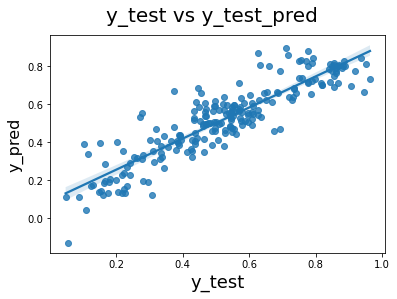

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

#### Equation for best fitted line

In [71]:
 # list of coefs
lm_3.params


const             0.170861
temp              0.468757
windspeed        -0.156150
Spring           -0.081129
Summer            0.038572
Winter            0.078210
LightSnow        -0.284259
MistCloudy       -0.078237
Sat               0.066801
Year_2019         0.234246
Workingday_Yes    0.055724
dtype: float64


#### Equation:

$cnt = $0.469 * temp - $0.156 * windspeed - $0.081 * Spring +  $0.039 * Summer +  $0.078 * Winter -  $0.284 * LightSnow -  $0.0782 * MistCloudy + $0.0668 * Sat + $0.234 * Year_2019 + $0.05577 * Workingday_Yes



# Conclusions

Model Evaluation looks fine. Overall we have decent model

Features affecting demand are below :
- Temperature
- Season
- Working Day
- Weather Situation 
- Windspeed (inversely)


- Demand is high during Working days
- Demand is high during Summer seasons and less during Winter and Spring
- Demand is high when weather is Clear and less during Mist Cloudy and Light Snow
- Demand is high in 2019 compared to 2018
- Demand increases with temperature
- Demand decreases with windspeed